<a href="https://colab.research.google.com/github/gustavolq/Bootcamp-DataScience-Alura/blob/main/Modulo_02/Aulas/Tratamento_Exploracao_Visualizacao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tratamento, Exploração e Visualização de Dados**

Olá! Seja bem-vindo ao meu Notebook referente ao segundo módulo do Bootcamp de Data Science Aplicada da Alura.

Nesse notebook, iremos focar nos seguintes pontos :
- Avançar os conhecimentos em Python e Pandas para analisar dados reais.
- Criar gráficos estilizados com Seaborn
- Aprender como usar o pandas na manipulação dos dados.
- Analisar e explorar os dados criando hipótese de forma analítica.
- Criar visualizações e boas práticas.

## **1. Fontes externas, limpeza e manipulação de dados**

### **1.1 Introdução**

Iremos continuar a análise do primeiro módulo, querendo gerar mais visualizações, aprofundando nossos conhecimentos em Python e Pandas.

Nesse módulo iremos continuar trabalhando com os dados de gastos na produção hospitalar do SUS.

### **Usando Fontes Alternativas de Dados**

Iremos acessar os dados diretamente do GitHub, realizando uma requisição HTTP para a URL.

####**Abaixo, possuímos as células referentes ao primeiro módulo**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
dados = pd.read_csv("https://github.com/gustavolq/Bootcamp-DataScience-Alura/raw/main/Modulo_02/Aulas/ValorTotalGasto-2008-2021-Atendimento.csv", 
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep = ';', skipfooter=12, 
                    thousands = ".", decimal = ",")
# 5 primeiras linhas
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [4]:
# O .mean() realiza a remoção automática das colunas que possuem valores vazios
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [5]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,249999

In [6]:
# Realizando a alteração do índice para a coluna Unidade da Federação.
usaveis = usaveis.set_index("Unidade da Federação")

In [7]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,2

In [8]:
# Localização por coluna 
usaveis["2019/Ago"].head()

Unidade da Federação
11 Rondônia     8909111.89
12 Acre         2981072.98
13 Amazonas    16493719.52
14 Roraima      3181321.82
15 Pará        36462011.47
Name: 2019/Ago, dtype: float64

In [9]:
# Localização por Indice
usaveis.loc["12 Acre"].head()

2007/Ago     10470.07
2007/Set     14001.71
2007/Out     86200.85
2007/Nov    301323.68
2007/Dez    769612.36
Name: 12 Acre, dtype: float64

In [10]:
# Podemos transpor as colunas com as linhas (nossos estados viram a coluna) e plotar esse novo gráfico
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


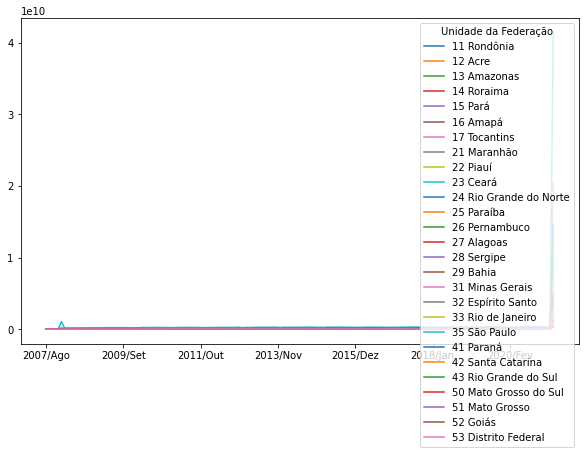

In [11]:
# Podemos verificar que em nosso gráfico possuímos valores próximos de 0 e no final temos um valor muito maior.
# Isso ocorre devido ao Total de cada estado ser demonstrado na última linha
usaveis.T.plot(figsize = (10,6))

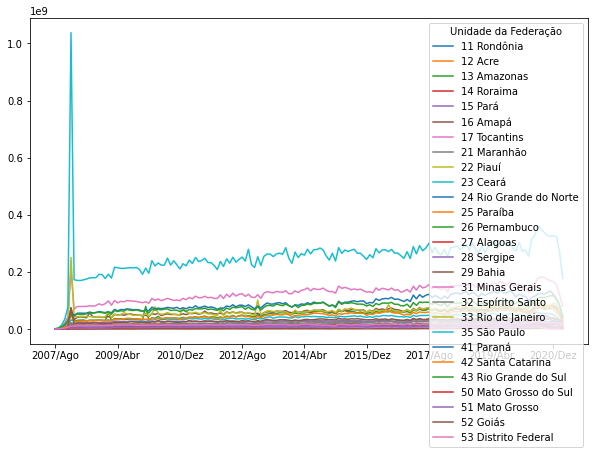

In [12]:
# Iremos realizar a remoção dos valores Totais
usaveis = usaveis.drop("Total", axis = 1)
usaveis.T.plot(figsize=(10,6))

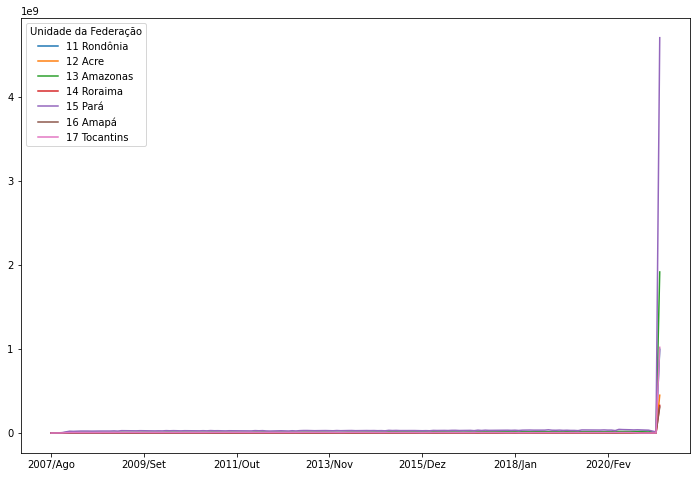

In [19]:
usaveis[:7].T.plot(figsize=(12,8))

Realizar o plot com uma busca aleatória utilizando o .sample().

Podemos utilizar o .random.seed do Numpy para definirmos quais valores serão retornados na aleatoriedade (interessante para reproduzirmos os mesmos resultados).



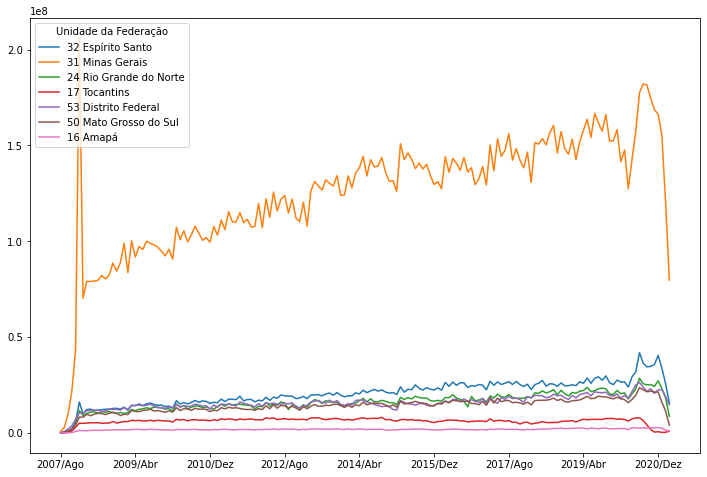

In [13]:
import numpy as np
np.random.seed(687942)

usaveis.sample(n = 7).T.plot(figsize = (12,8))

In [25]:
pd.options.mode.chained_assignment = None

usaveis['Regiao'] = ""
usaveis[0:7]['Regiao'] = "Norte"
usaveis[7:16]['Regiao'] = "Nordeste"
usaveis[16:20]['Regiao'] = "Sudeste"
usaveis[20:23]['Regiao'] = "Sul"
usaveis[23:]['Regiao'] = "Centro_Oeste"
usaveis.head(10)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964107e+08,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500472e+08,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917245e+09,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2478349.44,2674958.94,2721261.19,2844811.

In [26]:
usaveis["Total"] = usaveis.sum(axis = 1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,1.992821e+09,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,9.000945e+08,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,3.834490e+09,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2478349.44,2674958.94,2721261.19,2844811.

In [27]:
ordenado_por_total = usaveis.sort_values(by = 'Total', ascending = False)
ordenado_por_total.drop("Total", axis = 1, inplace = True)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,...,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07,Sul
43 Rio Grande do Sul,1049252.33,3182913.14,8571

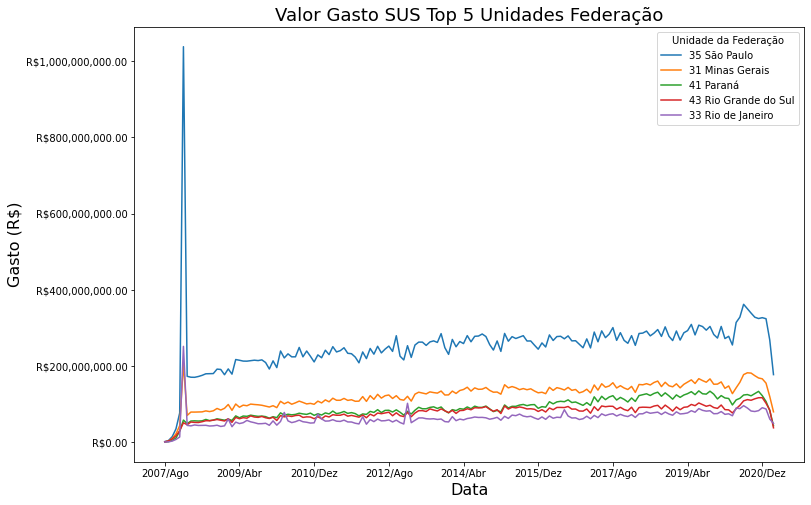

In [28]:
ax = ordenado_por_total.iloc[:, :-1].head(5).T.plot(figsize = (12,8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_title("Valor Gasto SUS Top 5 Unidades Federação", fontsize = 18)
ax.set_xlabel("Data", fontsize = 16)
ax.set_ylabel("Gasto (R$)", fontsize = 16)

plt.show()

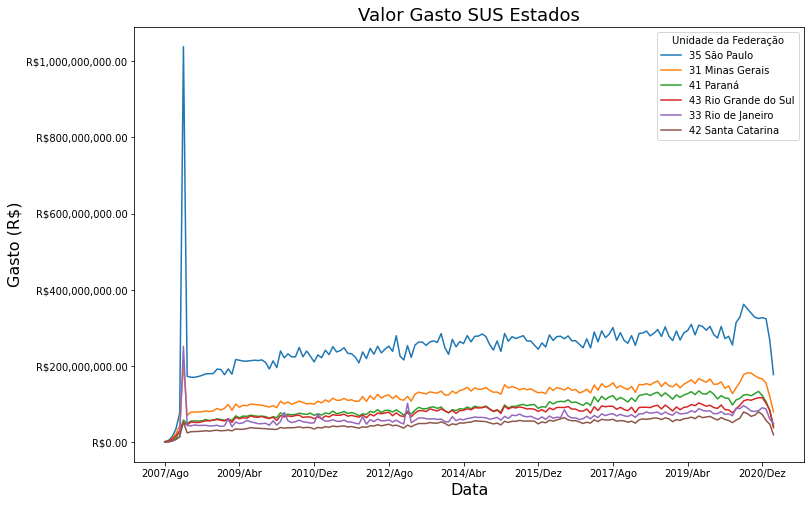

In [29]:
estados = ordenado_por_total.head(5).index.to_list()
estados.append('42 Santa Catarina')

ax = ordenado_por_total.drop('Regiao', axis = 1).loc[estados].T.plot(figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_title("Valor Gasto SUS Estados", fontsize = 18)
ax.set_xlabel("Data", fontsize = 16)
ax.set_ylabel("Gasto (R$)", fontsize = 16)

plt.show()

In [30]:
ordenado_por_total.iloc[:,6:].head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,2.508174e+08,...,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08,Sudeste
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,1.154872e+08,...,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07,Sudeste
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07,Sul
43 Rio Grande do Sul,4.

In [31]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,2.508174e+08,...,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08,Sudeste
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,1.154872e+08,...,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07,Sudeste
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07,Sul
43 Rio Grande do Sul,4.

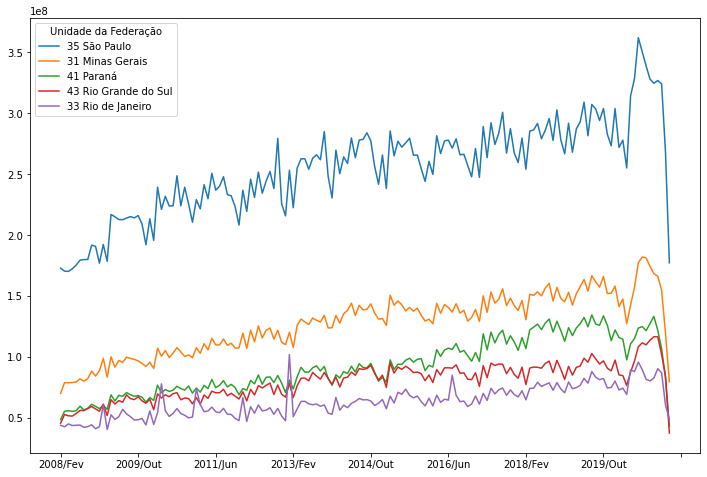

In [32]:
ordenado_por_total.drop('Regiao', axis = 1).head(5).T.plot(figsize=(12,8))

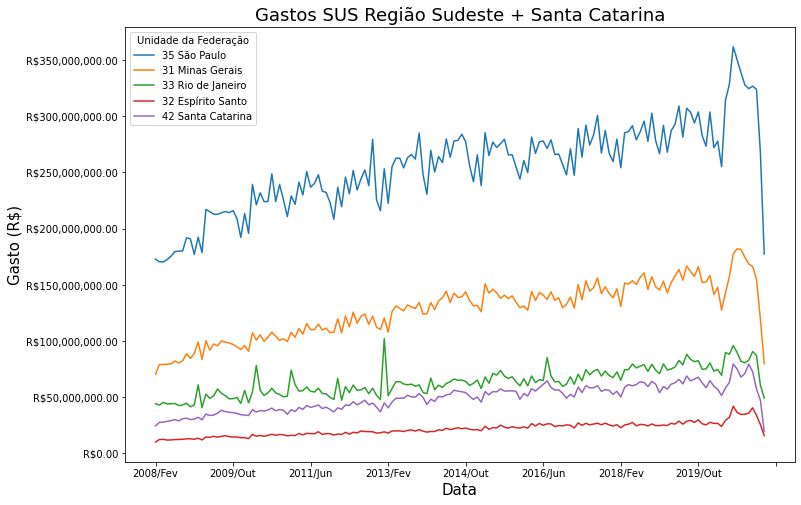

In [33]:
estados = ordenado_por_total.query('Regiao == "Sudeste"').index.to_list()
estados.append('42 Santa Catarina')

ax = ordenado_por_total.loc[estados].drop('Regiao', axis = 1).T.plot(figsize = (12,8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

ax.set_title('Gastos SUS Região Sudeste + Santa Catarina', fontsize = 18)
ax.set_xlabel('Data', fontsize = 15)
ax.set_ylabel('Gasto (R$)', fontsize = 15)

plt.show()

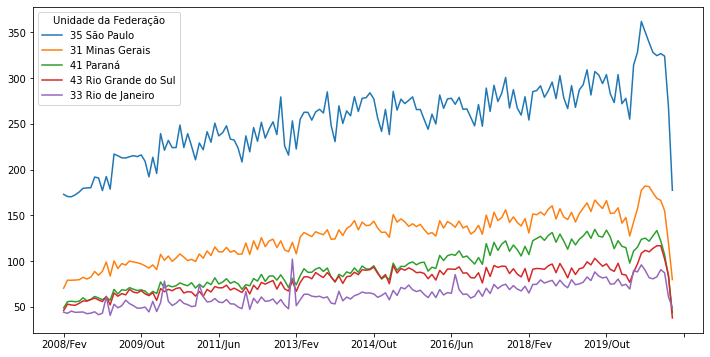

In [34]:
ordenado_por_total_sem_regiao = ordenado_por_total.drop('Regiao', axis = 1) / 1000000
ordenado_por_total_sem_regiao.head(5).T.plot(figsize = (12,6))

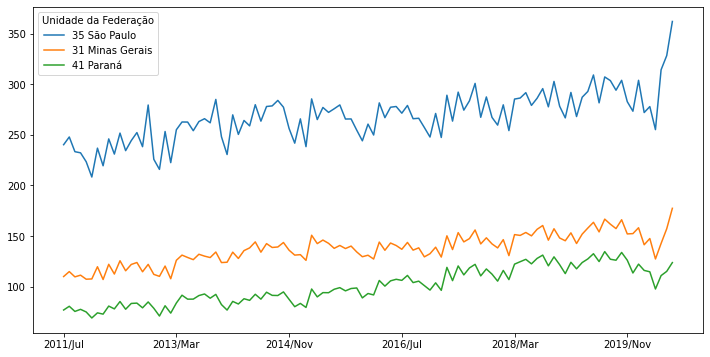

In [35]:
meses_filtrados = ordenado_por_total_sem_regiao.columns[41:150]
ordenado_por_total_sem_regiao[meses_filtrados].head(3).T.plot(figsize = (12,6))
plt.show()

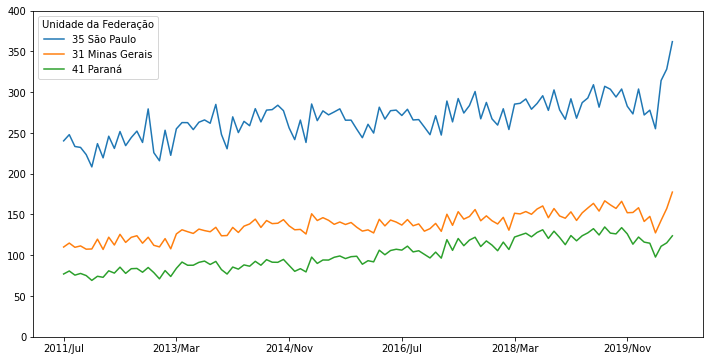

In [36]:
ordenado_por_total_sem_regiao[meses_filtrados].head(3).T.plot(figsize = (12,6))
plt.ylim(0,400)
plt.show()

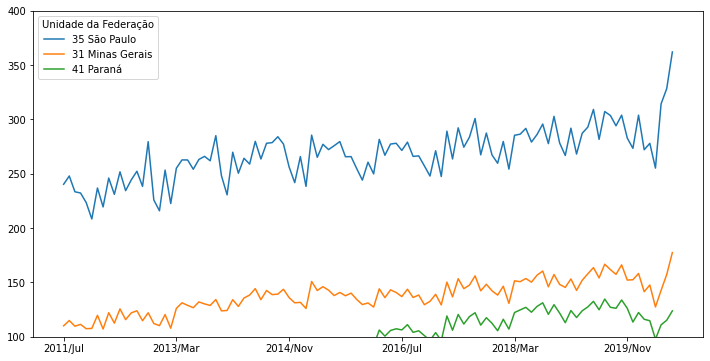

In [37]:
ordenado_por_total_sem_regiao[meses_filtrados].head(3).T.plot(figsize = (12,6))
plt.ylim(100,400)
plt.show()

(0.0, 400.0)

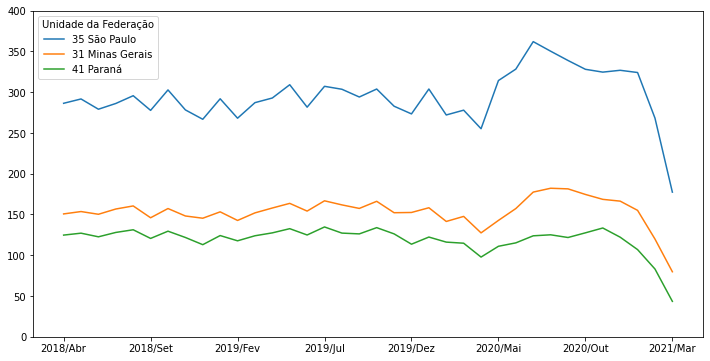

In [ ]:
ordenado_por_total_sem_regiao[ordenado_por_total_sem_regiao.columns[-36:]].head(3).T.plot(figsize=(12,6))
plt.ylim(0, 400)

In [38]:
 mes_mais_recente = ordenado_por_total_sem_regiao.columns[-1]
 mes_mais_recente

'2021/Mar'

In [39]:
gastos_mais_recente = ordenado_por_total_sem_regiao[mes_mais_recente]
gastos_mais_recente.head()

Unidade da Federação
35 São Paulo            177.408318
31 Minas Gerais          79.780838
41 Paraná                43.480729
43 Rio Grande do Sul     37.798833
33 Rio de Janeiro        49.149884
Name: 2021/Mar, dtype: float64

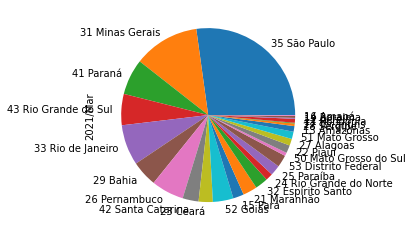

In [ ]:
gastos_mais_recente.plot(kind = 'pie')

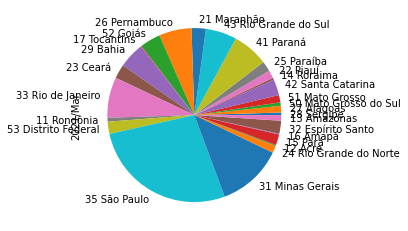

In [ ]:
gastos_mais_recente.sample(frac=1).plot(kind='pie')

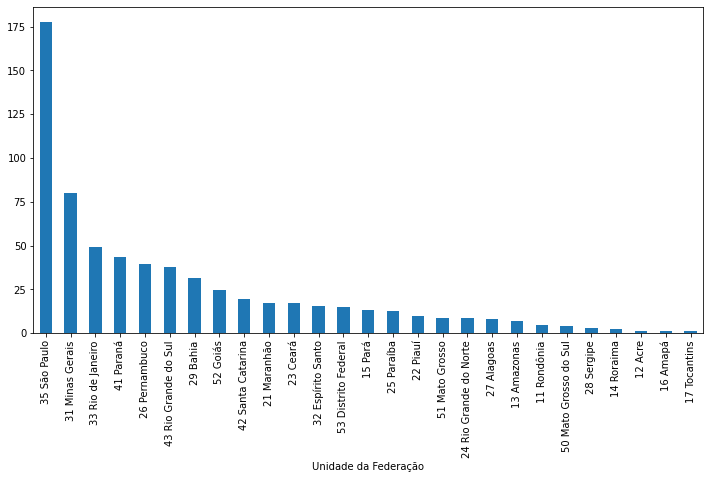

In [ ]:
gastos_mais_recente.sort_values(ascending = False).plot(kind = 'bar', figsize = (12,6))
plt.show()

#### **A partir das células abaixo, teremos os códigos do Módulo 02**

Primeiro, iremos realizar a plotagem dos valores do último mês, mas não por valor absoluto (desconsidera a relatividade).

Sempre devemos pensar em um gráfico se os números são absolutos ou relativos / proporcionais à algo.

É muito interessante realizar a demonstração dos 2 juntos.

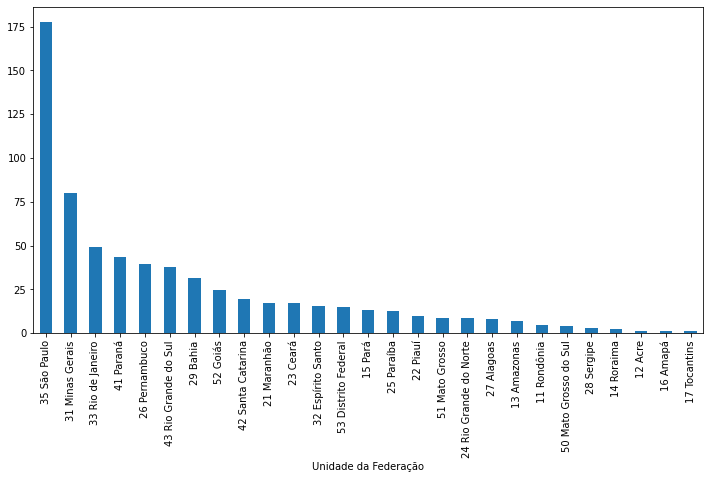

In [40]:
gastos_mais_recente.sort_values(ascending = False).plot(kind = 'bar', figsize = (12,6))
plt.show()

Podemos verificar os gráficos proporcionais em comparação ao total repassado pelo governo, onde podemos identificar que 27% foram para SP, 12% para MG...

**Mas será que a quantidade da população em cada estado corresponde à mesma proporção dos gastos?**

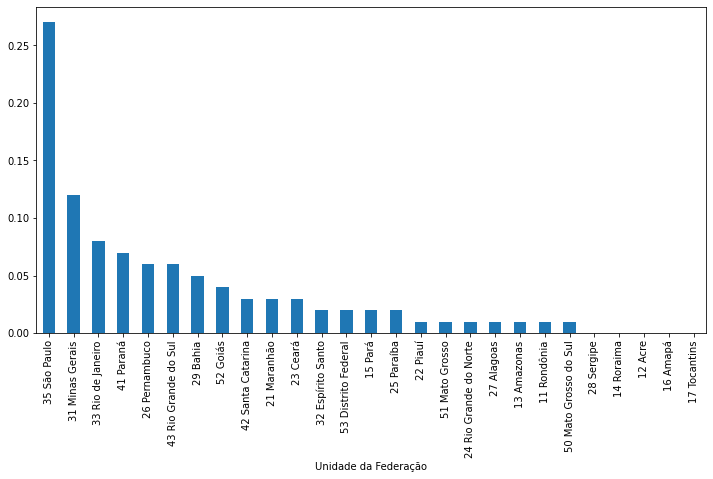

In [49]:
gastos_proporcionais = round((gastos_mais_recente / gastos_mais_recente.sum()).sort_values(ascending = False), 2)

plt.figure(figsize = (12,6))
gastos_proporcionais.plot(kind = 'bar')
plt.show()

Para analisar os dados da população, utilizaremos os dados de estimativa da população em 2020 fornecidos pelo IBGE, onde podemos realizar o acesso clicando [aqui](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).

Visto que o documento se encontra em .xls, iremos utilizar a função ```read_excel``` do Pandas.

In [50]:
ibge_estimativa = pd.read_excel("https://github.com/gustavolq/Bootcamp-DataScience-Alura/raw/main/Modulo_02/Aulas/Estimativa_Populacao-2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


Uma outra maneira de realizarmos a leitura dos nossos dados é buscando os mesmos em uma tabela de wikipedia (utilizando copy and paste) e utlizar ```""" ``` para identificar todo o texto como uma string apenas.

In [54]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# Fonte : https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

Após isso, utilizamos o read_csv para a leitura da nossa string com o separador ```"\t"``` que é a representação para o ```tab```.

In [55]:
# pd.read_csv(dados_da_populacao, sep = "\t")

OSError: ignored

Ao realizar o comando acima, o mesmo apresenta um erro "OSError", que pode ser corrigido transformando a string dos dados_da_populacao para manipuladas igual um arquivo.

Para isso utilizamos ```StringIO()``` do pacote ```io```.

In [59]:
from io import StringIO
dados_da_populacao_io = StringIO(dados_da_populacao)
pd.read_csv(dados_da_populacao_io, sep = "\t")

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


### **Desafios**

**Desafio 01 : Ler esse arquivo direto do WIKIPEDIA (html)!**

**Desafio 02 : Alterar as colunas Unidade Federativa e População para UF e populacao, remover as 2 últimas colunas e setar UF como índice.**